<a href="https://colab.research.google.com/github/llluizneto/cods/blob/master/Mortalidade_Fetal_19_a_21_artigo_prematuros_Passar_para_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

taxa de prematuridade em função da incidência da covid ( prematuros e covid)
em função da taxa de mortalidade por covid para aqueles estados


--------------
Taxa de incidência de COVID=que é o número de caso de covid sobre a população em geral; puxar o número mes a mes durante aquele ano e  o mesmo para o caso de mortalidade mes a mes e calcular a taxa de mortalidade com base numero de morte sobre o total da população ou a taxa de letalidade que será o número de casos sobre o número de casos sim de mortos sobre o número total de casos que ocorreram . Puxar a população da região


[ Materno = morte da mãe
[ Fetal= do feto (bebe dentro do útero)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Define o stilo para ggplot
#plt.style.use("ggplot")

In [ ]:
#!pip install YDbf # Pacote para ler o dbf
#import ydbf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install simpledbf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for simpledbf: filename=simpledbf-0.2.6-py3-none-any.whl size=13800 sha256=4d51010663745ee62a9c9e0cc2db3ed1e706151b2aa5210e69332d905e642f45
  Stored in directory: /root/.cache/pip/wheels/24/43/f4/39ad84349e5358346be977fe626160f5625fdd3ea8e017518c
Successfully built simpledbf


In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from simpledbf import Dbf5

In [ ]:
dbf2 = Dbf5('/content/drive/MyDrive/DataSus/SIM/DADOS_SIM/DOMAT21.dbf', codec='latin')

In [ ]:
df2 = dbf2.to_dataframe()
df2.head(3)

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,15042021,0830,832,320090,04031982,439,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1352
1,1,2,09052021,1505,829,292650,02081990,430,2,4,...,NaN,1,M,NaN,NaN,NaN,NaN,NaN,NaN,1732
2,1,2,21052021,2215,833,330490,07051993,428,2,4,...,NaN,1,M,NaN,NaN,NaN,NaN,NaN,NaN,1842


In [ ]:
df2.shape #29105 28993

(1965, 87)

In [ ]:
#file = '/content/drive/MyDrive/DataSus/SIM/DADOS_SIM/DOBR2020.dbf' #Endereço do arquivo
#dbf = ydbf.open(file,encoding='iso-8859-1')

In [ ]:
#print('Arquivo com:', dbf.numrec, 'registros e', dbf.numfields, 'atributos')

Arquivo com: 1556824 registros e 87 atributos


In [ ]:
df2.columns

Index(['ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'CAUSAMAT',
       'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV

In [ ]:
lista=['ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'CAUSAMAT',
       'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'NUDIASOBIN', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV',
       'FONTES', 'TPRESGINFO', 'TPNIVELINV', 'NUDIASINF', 'DTCADINF',
       'MORTEPARTO', 'DTCONCASO', 'FONTESINF', 'ALTCAUSA', 'CONTADOR']

In [ ]:
for i in lista:
  df2[i]=pd.to_numeric(df2[i], errors='coerce')

In [ ]:
df2.to_csv('OBITMAT_2021.csv')

**Brasil 2020**

In [ ]:
#divisão inteira- na divisão, o resultado final é um número inteiro.
mes_20=df_fetais_20['DTOBITO']//10000-(df_fetais_20['DTOBITO']//1000000)*100

In [ ]:
n=df_fetais_20.shape[0]

In [ ]:
one=[1]*n

In [ ]:
list_mes_ob_20=list(mes_20)
list_mes_ob_20 = pd.DataFrame (list_mes_ob_20, columns = ['mes_ob'])
list_mes_ob_20

,mes_ob
0,6
1,6
2,6
3,6
4,3
...,...
1556819,12
1556820,12
1556821,12
1556822,12


In [ ]:
list_mes_one_20=list(one)
list_mes_one_20 = pd.DataFrame (list_mes_one_20, columns = ['contador'])
list_mes_one_20

,contador
0,1
1,1
2,1
3,1
4,1
...,...
1556819,1
1556820,1
1556821,1
1556822,1


In [ ]:
df_fetais_mes_20 = pd.concat([df_fetais_20, list_mes_one_20,list_mes_ob_20], axis=1)

In [ ]:
df_fetais_mes_20

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,contador,mes_ob
0,1,2,21062020,225.0,823.0,230440.0,22111962.0,457,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,6
1,1,2,23062020,645.0,823.0,230100.0,14031942.0,478,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,6
2,1,2,27062020,320.0,823.0,230410.0,20011961.0,459,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,6
3,1,2,29062020,2030.0,NaN,NaN,12071934.0,485,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,6
4,1,2,8032020,605.0,817.0,171650.0,2031930.0,490,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556819,1,2,21122020,1500.0,815.0,150276.0,16071929.0,491,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1556820,1,12
1556820,1,2,24122020,NaN,815.0,150375.0,11041920.0,500,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1556821,1,12
1556821,1,2,25122020,500.0,813.0,130140.0,11092019.0,401,2,5.0,...,NaN,NaN,10062021.0,3.0,10062021.0,NaN,2.0,1556822,1,12
1556822,1,2,30122020,NaN,813.0,130140.0,28122020.0,202,2,5.0,...,NaN,NaN,7052021.0,3.0,7052021.0,NaN,1.0,1556823,1,12


In [ ]:
df_ob_20=df_fetais_mes_20.groupby(['mes_ob'])['contador'].sum().reset_index()

In [ ]:
df_ob_20

,mes_ob,contador
0,1,110932
1,2,104255
2,3,117888
3,4,123596
4,5,154511
5,6,140663
6,7,145262
7,8,141329
8,9,127115
9,10,128797


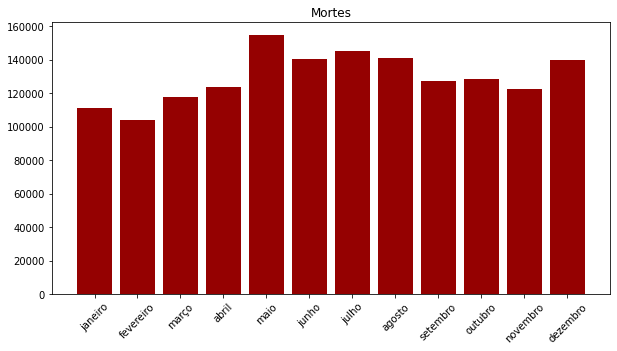

In [ ]:
fig, ax1 = plt.subplots( figsize=(10,5))
grupos = ['janeiro', 'fevereiro', 'março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
valores = df_ob_20['contador']
plt.bar(grupos, valores,color='#950101',alpha=1.0)
plt.title('Mortes')
plt.xticks(rotation=45)
plt.show()



**Fim Brasil**

**Regiões Brasil 2020**

In [ ]:
cods_est=df_fetais_mes_20['CODMUNOCOR']//10000
cods_est

0          23
1          23
2          23
3          22
4          17
           ..
1556819    15
1556820    15
1556821    13
1556822    13
1556823    13
Name: CODMUNOCOR, Length: 1556824, dtype: int64

In [ ]:
cods_est

0          23
1          23
2          23
3          22
4          17
           ..
1556819    15
1556820    15
1556821    13
1556822    13
1556823    13
Name: CODMUNOCOR, Length: 1556824, dtype: int64

In [ ]:
list_cods_20=list(cods_est)

In [ ]:
list_cods_20=list(cods_est)
list_cods_20 = pd.DataFrame (list_cods_20, columns = ['cods_est'])
list_cods_20

,cods_est
0,23
1,23
2,23
3,22
4,17
...,...
1556819,15
1556820,15
1556821,13
1556822,13


In [ ]:
list_cods_20 = list_cods_20.reset_index() #quando se concatena depois é bom fazer o reset index para sumir os NaN futuros
list_cods_20=list_cods_20.drop(['index'],axis=1)

In [ ]:
df_fetais_mes_20 = pd.concat([df_fetais_mes_20, list_cods_20], axis=1)

In [ ]:
df_fetais_mes_20

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,contador,mes_ob,cods_est
0,1,2,21062020,225.0,823.0,230440.0,22111962.0,457,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,6,23
1,1,2,23062020,645.0,823.0,230100.0,14031942.0,478,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,6,23
2,1,2,27062020,320.0,823.0,230410.0,20011961.0,459,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,6,23
3,1,2,29062020,2030.0,NaN,NaN,12071934.0,485,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4,1,6,22
4,1,2,8032020,605.0,817.0,171650.0,2031930.0,490,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556819,1,2,21122020,1500.0,815.0,150276.0,16071929.0,491,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1556820,1,12,15
1556820,1,2,24122020,NaN,815.0,150375.0,11041920.0,500,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1556821,1,12,15
1556821,1,2,25122020,500.0,813.0,130140.0,11092019.0,401,2,5.0,...,NaN,10062021.0,3.0,10062021.0,NaN,2.0,1556822,1,12,13
1556822,1,2,30122020,NaN,813.0,130140.0,28122020.0,202,2,5.0,...,NaN,7052021.0,3.0,7052021.0,NaN,1.0,1556823,1,12,13


In [ ]:
#estados=[27,29,23,21,22,24,28,25,26] #nordeste
#estados=[12,16,13,15,11,14,17] #norte
#estados=[53,52,51,50] #centro oeste
#estados=[32,31,33,35] #sudeste
#estados=[41,43,42] #sul
#estados=[33] #RONDÔNIA
estados=[35] #sao paulo
#estados=[23] #ceará
#estados=[33] #RJ
#estados=[13] #amazonas
#estados=[53] #DF
#estados=[51] #mato grosso
#estados=[32] #ES

df_est_20=df_fetais_mes_20.loc[df_fetais_mes_20['cods_est'].isin(estados)].copy()
df_est_20 = df_est_20.reset_index() #quando se concatena depois é bom fazer o reset index para sumir os NaN futuros
df_est_20=df_est_20.drop(['index'],axis=1) #tirar a coluna index
df_20=df_est_20.copy()

In [ ]:
df_ob_20_est=df_20.groupby(['mes_ob'])['contador'].sum().reset_index()

In [ ]:
df_ob_20_est

,mes_ob,contador
0,1,24965
1,2,23185
2,3,26851
3,4,27282
4,5,32555
5,6,32610
6,7,33657
7,8,32897
8,9,29397
9,10,29995


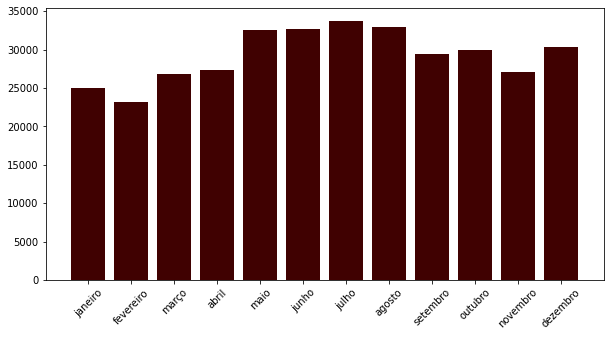

In [ ]:
fig, ax = plt.subplots( figsize=(10,5))
grupos = ['janeiro', 'fevereiro', 'março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
valores = df_ob_20_est['contador']
ax.bar(grupos, valores,color='#400101',alpha=1.0)
plt.xticks(rotation=45)
plt.show()



**Brasil 2019**

**Extrair 2019**

In [ ]:
df_fetais_19=pd.read_csv('/content/drive/MyDrive/DataSUS2/DOFET19.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_fetais_19

,ORIGEM,CODMUNCART,NUMREGCART,CODCART,DTREGCART,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,...,TPPOS,DTINVESTIG,LINHAA_O,LINHAB_O,LINHAC_O,LINHAD_O,LINHAII_O,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIG,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,NaN,NaN,NaN,NaN,1,30012019,35.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,291050,1,5136385.0,NaN,290750,26.0,4.0,3.0,3.0,354705.0,0.0,0.0,1.0,29.0,3.0,1.0,1.0,1440.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P020,12022019.0,1.0,S,S,3.2.00,3.2,NaN,13022019.0,P020,NaN,13022019,NaN,6.0,NaN,0,1,14,NaN,NaN,NaN,NaN,NaN,SXSSXX,NaN,NaN,NaN,20012020.0,1.0,3022020.0,NaN,2.0,3
1,1,NaN,NaN,NaN,NaN,1,24012019,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,230730,1,2562499.0,NaN,230730,19.0,9.0,9.0,NaN,999992.0,0.0,NaN,1.0,32.0,4.0,1.0,1.0,1314.0,NaN,NaN,NaN,...,S,12032019.0,NaN,NaN,NaN,NaN,NaN,P95,29012019.0,NaN,S,S,3.2.00,3.2,8.0,20032019.0,P95,NaN,21022019,NaN,9.0,NaN,0,1,55,NaN,NaN,NaN,NaN,NaN,SXSXXX,NaN,NaN,NaN,12032019.0,1.0,12032019.0,NaN,2.0,33
2,1,NaN,NaN,NaN,NaN,1,29012019,752.0,835.0,352720.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,354075,1,2087111.0,NaN,352720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,25.0,2.0,1.0,1.0,705.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P209,12022019.0,1.0,S,S,3.2.00,3.2,NaN,13022019.0,P209,NaN,13022019,NaN,NaN,NaN,0,1,15,NaN,NaN,NaN,NaN,NaN,SXXSXX,NaN,NaN,NaN,30122019.0,1.0,24062019.0,NaN,2.0,37
3,1,NaN,NaN,NaN,NaN,1,25012019,916.0,822.0,220770.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,210015,1,8015899.0,NaN,220770,21.0,3.0,2.0,NaN,622020.0,0.0,0.0,1.0,27.0,2.0,1.0,1.0,955.0,NaN,NaN,NaN,...,S,25012019.0,NaN,NaN,NaN,NaN,NaN,P392,14022019.0,1.0,S,S,3.2.00,3.2,3.0,18092019.0,P209/P072/P392,NaN,15022019,NaN,11.0,NaN,0,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113
4,1,NaN,NaN,NaN,NaN,1,14022019,2220.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,290570,1,2388057.0,NaN,290570,39.0,9.0,9.0,NaN,999992.0,1.0,3.0,1.0,36.0,4.0,2.0,1.0,1960.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P200,22022019.0,2.0,S,S,3.2.02,3.2,NaN,12072019.0,P200,NaN,26022019,NaN,9.0,NaN,0,1,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29100,1,NaN,NaN,NaN,NaN,1,28122019,NaN,851.0,510330.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,510330,6,NaN,NaN,510330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22022020.0,NaN,NaN,NaN,NaN,NaN,NaN,25032020.0,NaN,N,N,2...0,NaN,2.0,NaN,P95,NaN,25032020,NaN,NaN,NaN,0,1,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1378861
29101,1,NaN,NaN,NaN,NaN,1,30032019,1230.0,815.0,150375.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,150375,3,NaN,NaN,150375,31.0,3.0,1.0,4.0,NaN,6.0,0.0,1.0,36.0,4.0,1.0,1.0,3100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3062019.0,NaN,N,N,2...0,NaN,NaN,NaN,P95,NaN,3062019,NaN,2.0,NaN,0,1,65,NaN,NaN,NaN,NaN,NaN,SXXSXX,NaN,NaN,NaN,14082019.0,1.0,9082019.0,NaN,1.0,1378864
29102,1,NaN,NaN,NaN,NaN,1,9022019,2130.0,815.0,150375.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,150375,3,NaN,NaN,150375,13.0,4.0,2.0,8.0,NaN,0.0,0.0,1.0,36.0,4.0,1.0,1.0,2500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3062019.0,NaN,N,N,2...0,NaN,NaN,NaN,P95,NaN,3062019,NaN,4.0,NaN,0,1,114,NaN,NaN,NaN,NaN,NaN,

**Brasil**

In [ ]:
mes_19=df_fetais_19['DTOBITO']//10000-(df_fetais_19['DTOBITO']//1000000)*100

In [ ]:
n=df_fetais_19.shape[0]

In [ ]:
one=[1]*n

In [ ]:
list_mes_ob_19=list(mes_19)
list_mes_ob_19 = pd.DataFrame (list_mes_ob_19, columns = ['mes_ob'])
list_mes_ob_19

,mes_ob
0,1
1,1
2,1
3,1
4,2
...,...
29100,12
29101,3
29102,2
29103,7


In [ ]:
list_mes_one_19=list(one)
list_mes_one_19 = pd.DataFrame (list_mes_one_19, columns = ['contador'])
list_mes_one_19

,contador
0,1
1,1
2,1
3,1
4,1
...,...
29100,1
29101,1
29102,1
29103,1


In [ ]:
df_fetais_mes_19 = pd.concat([df_fetais_19, list_mes_one_19,list_mes_ob_19], axis=1)

In [ ]:
df_fetais_mes_19

In [ ]:
df_ob_19=df_fetais_mes_19.groupby(['mes_ob'])['contador'].sum().reset_index()

In [ ]:
df_ob_19

,mes_ob,contador
0,1,2699
1,2,2408
2,3,2592
3,4,2533
4,5,2641
5,6,2301
6,7,2370
7,8,2419
8,9,2186
9,10,2339


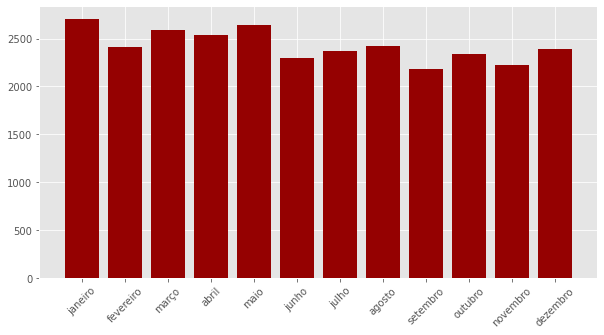

In [ ]:
fig, ax1 = plt.subplots( figsize=(10,5))
grupos = ['janeiro', 'fevereiro', 'março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
valores = df_ob_19['contador']
plt.bar(grupos, valores,color='#950101',alpha=1.0)
plt.xticks(rotation=45)
plt.show()



**Fim Brasil**

**Regiões Brasil**

In [ ]:
cods_est=df_fetais_mes_19['CODMUNOCOR']//10000
cods_est

0        29
1        23
2        35
3        22
4        29
         ..
29100    51
29101    15
29102    15
29103    16
29104    13
Name: CODMUNOCOR, Length: 29105, dtype: int64

In [ ]:
cods_est

0        29
1        23
2        35
3        22
4        29
         ..
29100    51
29101    15
29102    15
29103    16
29104    13
Name: CODMUNOCOR, Length: 29105, dtype: int64

In [ ]:
list_cods_19=list(cods_est)
list_cods_19 = pd.DataFrame (list_cods_19, columns = ['cods_est'])
list_cods_19

,cods_est
0,29
1,23
2,35
3,22
4,29
...,...
29100,51
29101,15
29102,15
29103,16


In [ ]:
list_cods_19 = list_cods_19.reset_index() #quando se concatena depois é bom fazer o reset index para sumir os NaN futuros
list_cods_19=list_cods_19.drop(['index'],axis=1)

In [ ]:
df_fetais_mes_19 = pd.concat([df_fetais_mes_19, list_cods_19], axis=1)

In [ ]:
#estados=[27,29,23,21,22,24,28,25,26] #nordeste
#estados=[12,16,13,15,11,14,17] #norte
#estados=[53,52,51,50] #centro oeste
#estados=[32,31,33,35] #sudeste
#estados=[41,43,42] #sul
#estados=[33] #RONDÔNIA
estados=[35] #sao paulo
#estados=[23] #ceará
#estados=[33] #RJ
#estados=[13] #amazonas
#estados=[53] #DF
#estados=[51] #mato grosso
#estados=[32] #ES

df_est_19=df_fetais_mes_19.loc[df_fetais_mes_19['cods_est'].isin(estados)].copy()
df_est_19 = df_est_19.reset_index() #quando se concatena depois é bom fazer o reset index para sumir os NaN futuros
df_est_19=df_est_19.drop(['index'],axis=1) #tirar a coluna index
df_19=df_est_19.copy()

In [ ]:
df_ob_19_est=df_19.groupby(['mes_ob'])['contador'].sum().reset_index()

In [ ]:
df_ob_19_est

,mes_ob,contador
0,1,501
1,2,442
2,3,477
3,4,419
4,5,460
5,6,415
6,7,380
7,8,387
8,9,345
9,10,410


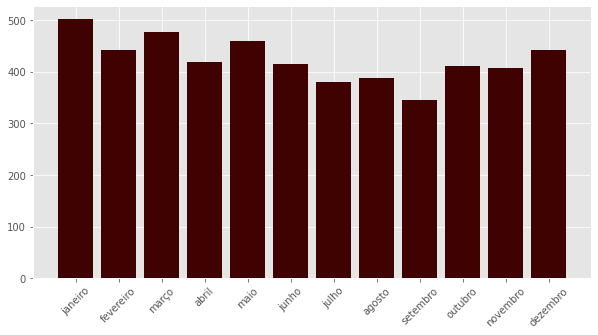

In [ ]:
fig, ax = plt.subplots( figsize=(10,5))
grupos = ['janeiro', 'fevereiro', 'março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
valores = df_ob_19_est['contador']
ax.bar(grupos, valores,color='#400101',alpha=1.0)
plt.xticks(rotation=45)
plt.show()



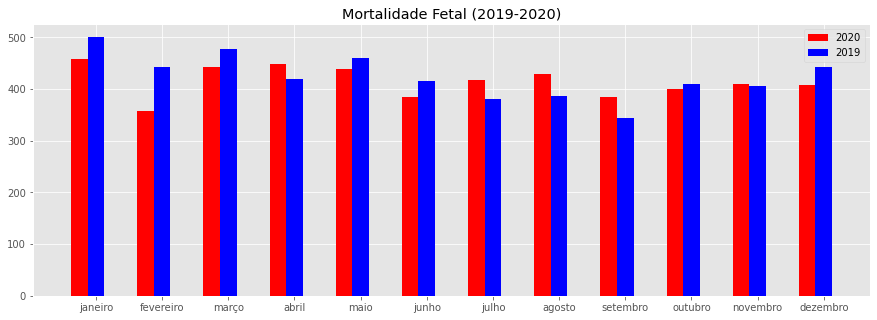

In [ ]:
# Quantidade de vendas para o Produto A
valores_produto_A = df_ob_20_est['contador'].values

# Quantidade de vendas para o Produto B
valores_produto_B = df_ob_19_est['contador'].values

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(valores_produto_A))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.subplots( figsize=(15,5))
plt.bar(x1, valores_produto_A, width=0.25, label = '2020', color = 'r')
plt.bar(x2, valores_produto_B, width=0.25, label = '2019', color = 'b')

# coloca o nome dos meses como label do eixo x
meses = ['janeiro', 'fevereiro', 'março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
plt.xticks([x + 0.25 for x in range(len(valores_produto_A))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Mortalidade Fetal (2019-2020)")
plt.show()